In [8]:
sim_res = 2e9
awg_res = 5e8

# Quantum Volume

In [9]:
import tensorflow as tf

In [10]:
from qiskit.circuit.library import QuantumVolume as QuantumVolumeCircuit


In [11]:
qv_circuit = QuantumVolumeCircuit(4, depth=4, seed=24)
qv_circuit.draw()

┌──────────────────────────┐
q_0: ┤0                         ├
     │                          │
q_1: ┤1                         ├
     │  quantum_volume_[4,4,24] │
q_2: ┤2                         ├
     │                          │
q_3: ┤3                         ├
     └──────────────────────────┘

In [12]:
qv_circuit.decompose().draw()

┌──────────┐┌──────────┐┌──────────┐┌──────────┐            
q_0: ────────────┤0         ├┤1         ├┤0         ├┤0         ├────────────
     ┌──────────┐│          ││  su4_751 ││  su4_784 ││          │┌──────────┐
q_1: ┤0         ├┤          ├┤0         ├┤1         ├┤  su4_506 ├┤0         ├
     │  su4_330 ││  su4_383 │├──────────┤├──────────┤│          ││          │
q_2: ┤1         ├┤          ├┤1         ├┤0         ├┤1         ├┤  su4_128 ├
     └──────────┘│          ││  su4_405 ││  su4_575 │└──────────┘│          │
q_3: ────────────┤1         ├┤0         ├┤1         ├────────────┤1         ├
                 └──────────┘└──────────┘└──────────┘            └──────────┘

Transpile the circuit to the native gates

In [13]:
from qiskit import transpile
# from qiskit_aer import Aer

In [14]:
# backend = Aer.get_backend('aer_simulator')

Aer all possible instructions

In [15]:
# config = backend.configuration()
# Allowed gates
# config.basis_gates

In [18]:
decomposed_circuit = transpile(qv_circuit, basis_gates=["rx", "ry", "cz"], optimization_level=3)
decomposed_circuit.draw()

global phase: 1.9591
     ┌──────────────┐ ┌────────────┐ ┌───────────┐         ┌────────────┐»
q_0: ┤ Rx(-0.36694) ├─┤ Ry(2.1235) ├─┤ Rx(1.009) ├──────■──┤ Rx(1.2029) ├»
     ├─────────────┬┘┌┴────────────┤┌┴───────────┴┐     │ ┌┴────────────┤»
q_1: ┤ Rx(0.24327) ├─┤ Ry(0.50312) ├┤ Rx(-1.3647) ├──■──┼─┤ Rx(0.91141) ├»
     ├─────────────┤ └┬────────────┤├─────────────┴┐ │  │ └┬────────────┤»
q_2: ┤ Rx(0.41585) ├──┤ Ry(1.8609) ├┤ Rx(0.034328) ├─■──┼──┤ Rx(2.9535) ├»
     ├─────────────┴┐ ├────────────┤├─────────────┬┘    │  ├────────────┤»
q_3: ┤ Rx(-0.63573) ├─┤ Ry(2.4027) ├┤ Rx(-1.2049) ├─────■──┤ Rx(2.8593) ├»
     └──────────────┘ └────────────┘└─────────────┘        └────────────┘»
«                      ┌─────────────┐┌─────────┐ ┌─────────┐      »
«q_0: ───────────────■─┤ Rx(-2.0895) ├┤ Ry(π/2) ├─┤ Rx(π/2) ├────■─»
«                    │ ├─────────────┤├─────────┤ ├─────────┤    │ »
«q_1: ────────────■──┼─┤ Rx(-1.0984) ├┤ Ry(π/2) ├─┤ Rx(π/2) ├─■──┼─»
«     ┌─────────┐ │  │ └─┬─────────┬─┘├─────────┴┐└─────────┘ │  │ »
«q_2: ┤ Ry(π/2) ├─■──┼───┤ Rx(π/2) ├──┤ Ry(-π/2) ├────────────■──┼─»
«     ├─────────┤    │   ├─────────┤  ├──────────┤               │ »
«q_3: ┤ Ry(π/2) ├────■───┤ Rx(π/2) ├──┤ Ry(-π/2) ├───────────────■─»
«     └─────────┘        └─────────┘  └──────────┘                 »
«     ┌─────────────┐  ┌────────────┐┌─────────────┐    ┌─────────────┐»
«q_0: ┤ Rx(-2.1284) ├──┤ Ry(1.6463) ├┤ Rx(-2.5257) ├──■─┤ Rx(0.82587) ├»
«     ├─────────────┴┐┌┴────────────┤└┬────────────┤  │ └┬───────────┬┘»
«q_1: ┤ Rx(-0.60476) ├┤ Ry(0.70816) ├─┤ Rx(2.7899) ├──■──┤ Rx(2.968) ├─»
«     ├──────────────┤└┬────────────┤┌┴────────────┤    ┌┴───────────┴┐»
«q_2: ┤ Rx(-0.16084) ├─┤ Ry(1.4791) ├┤ Rx(0.37687) ├──■─┤ Rx(0.65963) ├»
«     └┬────────────┬┘ ├────────────┤├─────────────┴┐ │ └┬────────────┤»
«q_3: ─┤ Rx(1.6073) ├──┤ Ry(1.3951) ├┤ Rx(-0.43295) ├─■──┤ Rx(2.7258) ├»
«      └────────────┘  └────────────┘└──────────────┘    └────────────┘»
«                   ┌─────────────┐┌─────────┐ ┌─────────┐    ┌────────────┐ »
«q_0: ────────────■─┤ Rx(-1.9244) ├┤ Ry(π/2) ├─┤ Rx(π/2) ├─■──┤ Rx(2.3076) ├─»
«     ┌─────────┐ │ └─┬─────────┬─┘├─────────┴┐└─────────┘ │ ┌┴────────────┤ »
«q_1: ┤ Ry(π/2) ├─■───┤ Rx(π/2) ├──┤ Ry(-π/2) ├────────────■─┤ Rx(0.18526) ├─»
«     └─────────┘   ┌─┴─────────┴─┐├─────────┬┘┌─────────┐   └┬────────────┤ »
«q_2: ────────────■─┤ Rx(-1.0939) ├┤ Ry(π/2) ├─┤ Rx(π/2) ├─■──┤ Rx(-1.806) ├─»
«     ┌─────────┐ │ └─┬─────────┬─┘├─────────┴┐└─────────┘ │ ┌┴────────────┴┐»
«q_3: ┤ Ry(π/2) ├─■───┤ Rx(π/2) ├──┤ Ry(-π/2) ├────────────■─┤ Rx(-0.16248) ├»
«     └─────────┘     └─────────┘  └──────────┘              └──────────────┘»
«     ┌─────────────┐ ┌───────────┐     ┌─────────────┐               »
«q_0: ┤ Ry(0.98107) ├─┤ Rx(1.585) ├───■─┤ Rx(0.40754) ├───────────────»
«     └┬────────────┤┌┴───────────┴┐  │ └─────────────┘┌─────────────┐»
«q_1: ─┤ Ry(2.5167) ├┤ Rx(-1.9465) ├──┼────────■───────┤ Rx(0.50866) ├»
«      ├────────────┤└┬────────────┤  │        │       └┬────────────┤»
«q_2: ─┤ Ry(2.2512) ├─┤ Rx(1.8135) ├──■────────┼────────┤ Rx(2.6092) ├»
«     ┌┴────────────┤┌┴────────────┴┐          │        ├────────────┤»
«q_3: ┤ Ry(0.47464) ├┤ Rx(0.071919) ├──────────■────────┤ Rx(2.7914) ├»
«     └─────────────┘└──────────────┘                   └────────────┘»
«                   ┌─────────────┐  ┌─────────┐  ┌─────────┐               »
«q_0: ────────────■─┤ Rx(-1.4381) ├──┤ Ry(π/2) ├──┤ Rx(π/2) ├─────────────■─»
«                 │ └─────────────┘┌─┴─────────┴─┐├─────────┤ ┌─────────┐ │ »
«q_1: ────────────┼────────■───────┤ Rx(-1.7934) ├┤ Ry(π/2) ├─┤ Rx(π/2) ├─┼─»
«     ┌─────────┐ │        │       └─┬─────────┬─┘├─────────┴┐└─────────┘ │ »
«q_2: ┤ Ry(π/2) ├─■────────┼─────────┤ Rx(π/2) ├──┤ Ry(-π/2) ├────────────■─»
«     ├─────────┤          │         ├─────────┤  ├──────────┤              »
«q_3: ┤ Ry(π/2) ├──────────■─────────┤ Rx(π/2) ├──┤ Ry(-π/2) ├──────────────»
«     └─────────┘                    └─────

In [10]:
decomposed_circuit.measure_all()

In [11]:
len(decomposed_circuit)

85

## Create Lattice with qruise-toolset

In [12]:
from qruise.toolset.libraries.rydberg.lattice import SquareLattice
r12 = 4.0
lattice = SquareLattice(n_side=2, r_interatomic=r12)
lattice.draw()

In [13]:
from qruise.toolset.libraries.rydberg.rydbergsystem import RydbergSystem
hilbert_dim = 3
ryd_system = RydbergSystem(lattice=lattice, hilbert_dim=hilbert_dim)

In [14]:
ryd_system.rydberg_atom_list

[RydbergAtom(name='0', detuning=0.000 2pi Hz),
 RydbergAtom(name='1', detuning=0.000 2pi Hz),
 RydbergAtom(name='2', detuning=0.000 2pi Hz),
 RydbergAtom(name='3', detuning=0.000 2pi Hz)]

Create the drives needed in the quantum volume sequence

$R_x$ and $R_y$ gates for all the qubits

In [15]:
import numpy as np
from qruise.toolset.objects import Quantity
phase_y = Quantity(value=0.5 * np.pi, unit="rads")
phase_x = Quantity(value=0.0, unit="rads")

In [16]:
for atom in ryd_system.rydberg_atom_list:
    name = atom.name
    ryd_system.add_drive(
    "amplitude-phase",
    f"rx{name}",
    channel="raman",
    connected=[name],
    phase=phase_x,
)
    ryd_system.add_drive(
    "amplitude-phase",
    f"ry{name}",
    channel="raman",
    connected=[name],
    phase=phase_y,
)
    ryd_system.add_drive(
        "amplitude-phase",
        f"rydbergx{name}",
        channel="rydberg",
        connected=[name],
        phase=phase_x,
    )


In [17]:
rabi_amplitude = 2.5e6 # MHz
# t_pi = np.round(1 / (2 * rabi_amplitude) * 1e9) * 1e-9
# t_pi_quantity = Quantity(value=t_pi, unit="s")

In [18]:
# t_pi

In [19]:
# Example single qubit gate
# print("Name", decomposed_circuit[13].operation.name)
# print("Control", decomposed_circuit[13].qubits[0]._index)
# print("Target", decomposed_circuit[13].qubits[1]._index)
# print("Angle", decomposed_circuit[13].operation)

In [20]:
from qruise_utils import create_instructions, name_rx_gate, name_ry_gate, name_cz_gate

In [21]:
gate_list = create_instructions(rydberg_system=ryd_system, circuit=decomposed_circuit, rabi_amplitude=rabi_amplitude)

/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/signal/gates.py:211: UserWarning:

No ideal gate found for gate: rx. Use set_ideal() explicitly.

/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/signal/gates.py:211: UserWarning:

No ideal gate found for gate: -0.244421. Use set_ideal() explicitly.

/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/signal/gates.py:211: UserWarning:

No ideal gate found for gate: 0. Use set_ideal() explicitly.

/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/signal/gates.py:211: UserWarning:

No ideal gate found for gate: ry. Use set_ideal() explicitly.

/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/signal/gates.py:211: UserWarning:

No ideal gate found for gate: 1.733845. Use set_ideal() explicitly.

/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/signal/gates.py:211: UserWarning:

No ideal gate found for gate: 2.820336. Use set_ideal() explicitly.

/home/marco/GitHub_Qruise/qruise-t

barrier
measure
measure
measure
measure


/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/signal/gates.py:211: UserWarning:

No ideal gate found for gate: 1.382899. Use set_ideal() explicitly.

/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/signal/gates.py:211: UserWarning:

No ideal gate found for gate: 1.84174. Use set_ideal() explicitly.

/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/signal/gates.py:211: UserWarning:

No ideal gate found for gate: 1.836609. Use set_ideal() explicitly.

/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/signal/gates.py:211: UserWarning:

No ideal gate found for gate: 01. Use set_ideal() explicitly.

/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/signal/gates.py:211: UserWarning:

No ideal gate found for gate: 0.825933. Use set_ideal() explicitly.

/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/signal/gates.py:211: UserWarning:

No ideal gate found for gate: 2.637566. Use set_ideal() explicitly.

/home/marco/GitHub_Qrui

In [22]:
# Print all index and information
# gates_list = []
# for index, circuit in enumerate(decomposed_circuit[:5]):
#     # print(f"Index: {index} , Name: {circuit.operation.name}, Targets: {circuit.qubits}")
#     if circuit.operation.name == "ry":
#         gates_list.append(create_ry_gate(angle=circuit.operation.params[0], atom=circuit.qubits[0]._index))
#     elif circuit.operation.name == "rx":
#         gates_list.append(create_rx_gate(angle=circuit.operation.params[0], atom=circuit.qubits[0]._index))
#     elif circuit.operation.name == "cz":
#         gates_list.extend(create_cz_gate(atom1=circuit.qubits[0]._index, atom2=circuit.qubits[1]._index))
#     else:
#         print(circuit.operation.name)

In [23]:
qruise_istructions = ryd_system.instruction_list

In [24]:
qruise_istructions

[Instruction(rx_-0.244421_0[0]),
 Instruction(ry_1.733845_0[0]),
 Instruction(rx_2.820336_0[0]),
 Instruction(rx_-0.224827_1[1]),
 Instruction(ry_1.964055_1[1]),
 Instruction(rx_1.380926_1[1]),
 Instruction(rx_-2.995232_2[2]),
 Instruction(ry_2.030778_2[2]),
 Instruction(rx_-1.332986_2[2]),
 Instruction(cz_02_1[0,2]),
 Instruction(cz_02_2[0,2]),
 Instruction(cz_02_3[0,2]),
 Instruction(rx_0.656951_0[0]),
 Instruction(rx_2.898652_2[2]),
 Instruction(ry_1.570796_2[2]),
 Instruction(rx_-1.494957_0[0]),
 Instruction(ry_1.570796_0[0]),
 Instruction(rx_1.570796_0[0]),
 Instruction(rx_1.570796_2[2]),
 Instruction(ry_-1.570796_2[2]),
 Instruction(rx_2.972133_0[0]),
 Instruction(ry_1.614811_0[0]),
 Instruction(rx_1.975597_0[0]),
 Instruction(rx_-1.557723_2[2]),
 Instruction(ry_2.660799_2[2]),
 Instruction(rx_0.768566_2[2]),
 Instruction(rx_3.094099_3[3]),
 Instruction(ry_2.025474_3[3]),
 Instruction(rx_2.982176_3[3]),
 Instruction(cz_13_1[1,3]),
 Instruction(cz_13_2[1,3]),
 Instruction(cz_13_3[

In [25]:
len(ryd_system.instruction_list)

71

In [26]:
len(decomposed_circuit)

85

Collect the model from the Rydberg system

In [27]:
ryd_system.sim_res = sim_res
ryd_system.awg_res = awg_res

In [28]:
ryd_system.create_model()

Set the generator

In [29]:
import qruise.toolset.generator.devices as devices
from qruise.toolset.generator.generator import Generator

awg_res = (
    ryd_system.awg_res
)  # number of samples per second; realistic limited resolution of an AWG
v2hz = 1e6
rise_time_value = 100e-9

# create a dict of all the devices
generator_devices = {
    "AWG": devices.AWG(name="awg", resolution=ryd_system.awg_res),
    "DigitalToAnalog": devices.DigitalToAnalog(name="dac"),
    "VoltsToHertz": devices.VoltsToHertz(
        name="v_to_hz", V_to_Hz=Quantity(value=v2hz, unit="Hz/V")
    ),
}

chains = {}
for atom in ryd_system.rydberg_atom_list:
    name = atom.name
    name_rx = f"rx{name}"
    name_ry = f"ry{name}"
    name_rydbergx = f"rydbergx{name}"
    chains[name_rx] = {
        "AWG": [],
        "DigitalToAnalog": ["AWG"],
        "VoltsToHertz": ["DigitalToAnalog"],
    }
    chains[name_ry] = {
        "AWG": [],
        "DigitalToAnalog": ["AWG"],
        "VoltsToHertz": ["DigitalToAnalog"],
    }
    chains[name_rydbergx] = {
        "AWG": [],
        "DigitalToAnalog": ["AWG"],
        "VoltsToHertz": ["DigitalToAnalog"],
    }
device_generator = Generator(
    devices=generator_devices,
    chains=chains,
)

ryd_system.set_generator(device_generator)

In [30]:
ryd_system.generator.draw(qruise_istructions[-1], resolution=generator_devices["AWG"].resolution, line_shape="vhv")

Create generator

In [31]:
ryd_system.create_experiment()

I am in invalidate_propagators


In [32]:
ryd_system.generator.draw(qruise_istructions[-1], resolution=generator_devices["AWG"].resolution, line_shape="vhv")

In [33]:
an_instruction = ryd_system.instruction_list[-1]
prop = ryd_system.experiment.compute_propagators(gate_ids=[an_instruction.get_key()])

In [34]:
U = prop[an_instruction.get_key()]._tensor

In [35]:
ryd_system.experiment.draw_dynamics(sequence=[ryd_system.instruction_list[0].get_key()], state=ryd_system.model.get_init_state())

In [36]:
qruise_experiment = ryd_system.experiment

In [37]:
# qruise_experiment.compute_propagators()

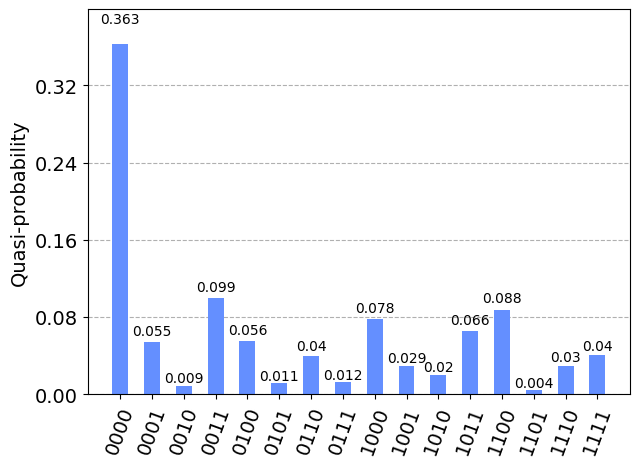

In [38]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
ideal_results = Statevector.from_instruction(qv_circuit).probabilities_dict()
plot_histogram(ideal_results)

Qruise backend

In [39]:
from qruise.toolset.qiskit import QruiseProvider

In [40]:
from qruise.toolset.libraries.rydberg import RydbergAtom


In [41]:
qruise_provider = QruiseProvider()
qruise_backend = qruise_provider.get_backend("qruise_qasm_rydberg_simulator")
# Set qubit type to Rydberg atom
qruise_backend.qubit_type = RydbergAtom
qruise_backend.set_qruise_experiment(qruise_experiment)
# qruise_backend._experiment_mode = "quantum_volume"

/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/experiment.py:153: UserWarning:

Using default simulation resolution in experiment, make sure this is what you expect (or you have set sim_res in the Instructions)



I am in invalidate_propagators
I am in invalidate_propagators
I am in invalidate_propagators
Out {'gate': 'rx', 'name': 'rx_-0.244421_0[0]', 'parameters': [{'date': '2024-04-15T18:13:01.821630', 'name': 'gate_error', 'unit': '', 'value': 0.0}, {'date': '2024-04-15T18:13:01.821630', 'name': 'gate_duration', 'unit': 's', 'value': 1.6e-08}], 'qubits': [0]}
Out {'gate': 'ry', 'name': 'ry_1.733845_0[0]', 'parameters': [{'date': '2024-04-15T18:13:01.821630', 'name': 'gate_error', 'unit': '', 'value': 0.0}, {'date': '2024-04-15T18:13:01.821630', 'name': 'gate_duration', 'unit': 's', 'value': 1.1e-07}], 'qubits': [0]}
Out {'gate': 'rx', 'name': 'rx_2.820336_0[0]', 'parameters': [{'date': '2024-04-15T18:13:01.821630', 'name': 'gate_error', 'unit': '', 'value': 0.0}, {'date': '2024-04-15T18:13:01.821630', 'name': 'gate_duration', 'unit': 's', 'value': 1.8e-07}], 'qubits': [0]}
Out {'gate': 'rx', 'name': 'rx_-0.224827_1[1]', 'parameters': [{'date': '2024-04-15T18:13:01.821630', 'name': 'gate_erro

In [42]:
qruise_backend._experiment_mode = "populations"

In [43]:
# # Look up propagator function
# def lookup_transform_function(drive_index: int) -> callable:
#     def lookup_transform(gate_dict: dict):
#         prop_dict = {}
#         sequence_list = []
#         for pulse_index in [1, 2, 3]:
#             name = gate_dict["name"]
#             gate_name = f"{name}{str(drive_index)}_{str(pulse_index)}"
#             prop_dict[gate_name] = qruise_experiment.lookup_propagator(
#                 **gate_dict,
#                 compute=False,
#                 gate_index=f"{str(drive_index)}_{str(pulse_index)}",
#             )
#             sequence_list.append(gate_name)

#         return prop_dict, sequence_list

#     return lookup_transform

In [44]:
# t_circuit = transpile(qv_circuit, qruise_backend, basis_gates=["rx", "ry", "cz"])#, optimization_level=3)
# t_circuit.draw()

In [45]:
def state_transform_function() -> callable:
    def state_transform(
        state: tf.Tensor, gate_dict: dict, reshape_after: bool, reshape_before: bool
    ):
        # Gate dict name
        gate_name = gate_dict["name"]
        if gate_name == "cz":
            atom1 = gate_dict["qubits"][0]
            atom2 = gate_dict["qubits"][1]
            gate_dict["name"] = name_cz_gate(atom1, atom2)
            for pulse_index in [1, 2, 3]:
                reshape_after = (
                None if reshape_after is None and pulse_index == 3 else False
                )
                state = qruise_experiment.lookup_propagator(
                    **gate_dict,
                    compute=False,
                    gate_index=f"_{str(pulse_index)}",
                ).propagate_state(
                    state, reshape_after=reshape_after, reshape_before=reshape_before
                )
                reshape_before = False
        else:
            print("Gate dict", gate_dict)
            angle = gate_dict["params"][0]
            atom = gate_dict["qubits"][0]
            gate_dict["name"] = name_rx_gate(angle, atom) if "rx" in gate_name else name_ry_gate(angle, atom)
            state = qruise_experiment.lookup_propagator(
                **gate_dict,
                compute=False,
            ).propagate_state(
                state, reshape_after=reshape_after, reshape_before=reshape_before
            )
        return state

    return state_transform

In [46]:
# qruise_backend._lookup_propagator_function = lookup_transform_function

In [47]:
qruise_backend._state_propagation_function = state_transform_function()

In [48]:
# qruise_backend.configuration().coupling_map

In [49]:
decomposed_circuit.draw()

global phase: 4.4448
        ┌──────────────┐┌────────────┐┌────────────┐   ┌─────────────┐»
   q_0: ┤ Rx(-0.24442) ├┤ Ry(1.7338) ├┤ Rx(2.8203) ├─■─┤ Rx(0.65695) ├»
        ├──────────────┤├────────────┤├────────────┤ │ └─────────────┘»
   q_1: ┤ Rx(-0.22483) ├┤ Ry(1.9641) ├┤ Rx(1.3809) ├─┼────────■───────»
        ├─────────────┬┘├────────────┤├────────────┤ │        │       »
   q_2: ┤ Rx(-2.9952) ├─┤ Ry(2.0308) ├┤ Rx(-1.333) ├─■────────┼───────»
        └┬────────────┤ ├────────────┤├────────────┤          │       »
   q_3: ─┤ Rx(3.0941) ├─┤ Ry(2.0255) ├┤ Rx(2.9822) ├──────────■───────»
         └────────────┘ └────────────┘└────────────┘                  »
meas: 4/══════════════════════════════════════════════════════════════»
                                                                      »
«                                    ┌────────────┐  ┌─────────┐  ┌─────────┐ »
«   q_0: ──────────────────────────■─┤ Rx(-1.495) ├──┤ Ry(π/2) ├──┤ Rx(π/2) ├─»
«        ┌────────────┐            │ └────────────┘┌─┴─────────┴─┐├─────────┤ »
«   q_1: ┤ Rx(1.0819) ├────────────┼───────■───────┤ Rx(-2.2661) ├┤ Ry(π/2) ├─»
«        ├────────────┤┌─────────┐ │       │       └─┬─────────┬─┘├─────────┴┐»
«   q_2: ┤ Rx(2.8987) ├┤ Ry(π/2) ├─■───────┼─────────┤ Rx(π/2) ├──┤ Ry(-π/2) ├»
«        ├────────────┤├─────────┤         │         ├─────────┤  ├──────────┤»
«   q_3: ┤ Rx(3.1306) ├┤ Ry(π/2) ├─────────■─────────┤ Rx(π/2) ├──┤ Ry(-π/2) ├»
«        └────────────┘└─────────┘                   └─────────┘  └──────────┘»
«meas: 4/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«                      ┌────────────┐ ┌────────────┐┌────────────┐»
«   q_0: ────────────■─┤ Rx(2.9721) ├─┤ Ry(1.6148) ├┤ Rx(1.9756) ├»
«        ┌─────────┐ │ └────────────┘ ├────────────┤├────────────┤»
«   q_1: ┤ Rx(π/2) ├─┼───────■────────┤ Rx(1.3829) ├┤ Ry(1.8417) ├»
«        └─────────┘ │       │       ┌┴────────────┤├────────────┤»
«   q_2: ────────────■───────┼───────┤ Rx(-1.5577) ├┤ Ry(2.6608) ├»
«                            │       ├─────────────┤├────────────┤»
«   q_3: ────────────────────■───────┤ Rx(-2.7106) ├┤ Ry(2.3158) ├»
«                                    └─────────────┘└────────────┘»
«meas: 4/═════════════════════════════════════════════════════════»
«                                                                 »
«                          ┌─────────────┐              ┌─────────────┐»
«   q_0: ────────────────■─┤ Rx(0.82593) ├────────────■─┤ Rx(-1.2666) ├»
«         ┌────────────┐ │ └┬────────────┤┌─────────┐ │ └─┬─────────┬─┘»
«   q_1: ─┤ Rx(1.8366) ├─■──┤ Rx(2.6376) ├┤ Ry(π/2) ├─■───┤ Rx(π/2) ├──»
«        ┌┴────────────┤    ├────────────┤└─────────┘   ┌─┴─────────┴─┐»
«   q_2: ┤ Rx(0.76857) ├─■──┤ Rx(1.0007) ├────────────■─┤ Rx(-1.2623) ├»
«        ├─────────────┤ │  ├────────────┤┌─────────┐ │ └─┬─────────┬─┘»
«   q_3: ┤ Rx(-1.5445) ├─■──┤ Rx(2.9008) ├┤ Ry(π/2) ├─■───┤ Rx(π/2) ├──»
«        └─────────────┘    └────────────┘└─────────┘     └─────────┘  »
«meas: 4/══════════════════════════════════════════════════════════════»
«                                                                      »
«        ┌─────────┐ ┌─────────┐    ┌────────────┐┌────────────┐┌─────────────┐»
«   q_0: ┤ Ry(π/2) ├─┤ Rx(π/2) ├─■──┤ Rx(1.6303) ├┤ Ry(2.5209) ├┤ Rx(0.81281) ├»
«        ├─────────┴┐└─────────┘ │ ┌┴────────────┤├────────────┤└┬───────────┬┘»
«   q_1: ┤ Ry(-π/2) ├────────────■─┤ Rx(0.23082) ├┤ Ry(1.3096) ├─┤ Rx(1.938) ├─»
«        ├─────────┬┘┌─────────┐   ├─────────────┤├────────────┤┌┴───────────┴┐»
«   q_2: ┤ Ry(π/2) ├─┤ Rx(π/2) ├─■─┤ Rx(-1.5784) ├┤ Ry(1.8426) ├┤ Rx(-1.9675) ├»
«        ├─────────┴┐└─────────┘ │ ├─────────────┤├────────────┤├─────────────┤»
«   q_3: ┤ Ry(-π/2) ├────────────■─┤ Rx(-2.8682) ├┤ Ry(1.4038) ├┤ Rx(-2.1269) ├»
«        └──────────┘              └─────────────┘└────────────┘└─────────────┘»
«meas: 4/══════════════════

In [50]:
job_results = qruise_backend.run(decomposed_circuit, shots=1000, memory=True)

Gate dict {'name': 'rx', 'params': [-0.24442111082617135], 'qubits': [0]}
Is propagator None? False
Gate dict {'name': 'ry', 'params': [1.7338448368921913], 'qubits': [0]}
Is propagator None? False
Gate dict {'name': 'rx', 'params': [2.8203357598818624], 'qubits': [0]}
Is propagator None? False
Gate dict {'name': 'rx', 'params': [-0.22482651461735825], 'qubits': [1]}
Is propagator None? False
Gate dict {'name': 'ry', 'params': [1.9640552379691587], 'qubits': [1]}
Is propagator None? False
Gate dict {'name': 'rx', 'params': [1.3809257353202256], 'qubits': [1]}
Is propagator None? False
Gate dict {'name': 'rx', 'params': [-2.995231993477482], 'qubits': [2]}
Is propagator None? False
Gate dict {'name': 'ry', 'params': [2.030778489541315], 'qubits': [2]}
Is propagator None? False
Gate dict {'name': 'rx', 'params': [-1.3329861800391765], 'qubits': [2]}
Is propagator None? False
Is propagator None? False
Is propagator None? False
Is propagator None? False
Gate dict {'name': 'rx', 'params': [

/home/marco/GitHub_Qruise/qruise-toolset/src/qruise/toolset/qiskit/backends.py:336: UserWarning:

The following operations are not supported yet: ['measure', 'barrier']



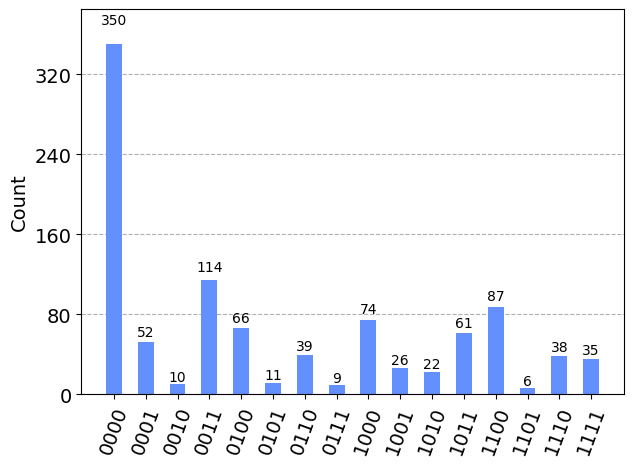

In [51]:
plot_histogram(job_results.result().get_counts())

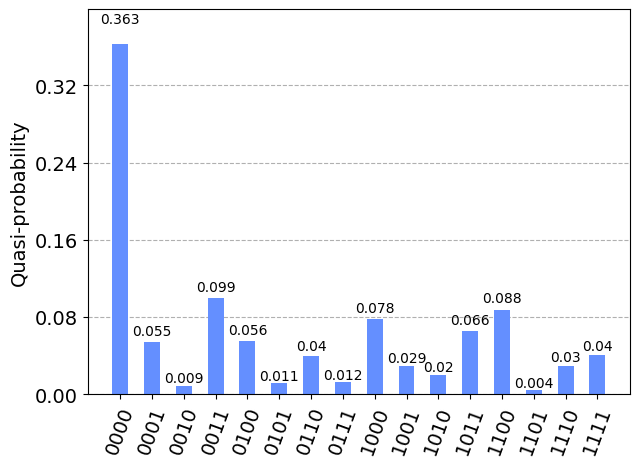

In [52]:
plot_histogram(ideal_results)